## Example: K Nearest Neighbors

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scratch.algos.knn import KNearestNeighbors
from scratch.utils.evaluation import *

plt.rcParams["figure.figsize"] = (20, 8)
sns.set(font_scale=1)
sns.set_style("whitegrid")

In [2]:
cancer = (
    pd.read_csv("../data/BreastCancer.csv", header=0)
    .sample(frac=1)
    .dropna(axis=0)
    .drop(columns=["id"])
    .replace({"diagnosis": {"M": 1, "B": 0}})
)

nvalid = int(np.floor(cancer.shape[0] * 0.3))

dftrain = cancer.head(n=-nvalid)
Xtrain = dftrain.drop(columns=["diagnosis"]).to_numpy()
ytrain = dftrain["diagnosis"].values

dfvalid = cancer.tail(n=nvalid)
Xvalid = dfvalid.drop(columns=["diagnosis"]).to_numpy()
yvalid = dfvalid["diagnosis"].values

In [3]:
list_targets = [("Total", cancer.diagnosis.values), ("Train", ytrain), ("Valid", yvalid)]
print("Label order:   [0 1]")
print("Target: Counts, Percentages:")

for name_, array_ in list_targets:
    vals, cnts = np.unique(array_, return_counts=True)
    print("\t{0}: {1}, {2}".format(name_, cnts, np.around(cnts / len(array_), 2)))

Label order:   [0 1]
Target: Counts, Percentages:
	Total: [357 210], [0.63 0.37]
	Train: [248 149], [0.62 0.38]
	Valid: [109  61], [0.64 0.36]


In [4]:
m = KNearestNeighbors(n_neighbors=5)
m.fit(X=Xtrain, y=ytrain)
ypred = m.predict(X=Xvalid)

In [5]:
c_count = build_confusion_matrix(y=yvalid, yhat=ypred, as_percentage=False)
print(c_count)

YHAT    0   1
Y            
0     105   4
1      10  51


In [6]:
c_percent = build_confusion_matrix(y=yvalid, yhat=ypred, as_percentage=True)
print(c_percent)

YHAT         0         1
Y                       
0     0.617647  0.023529
1     0.058824  0.300000


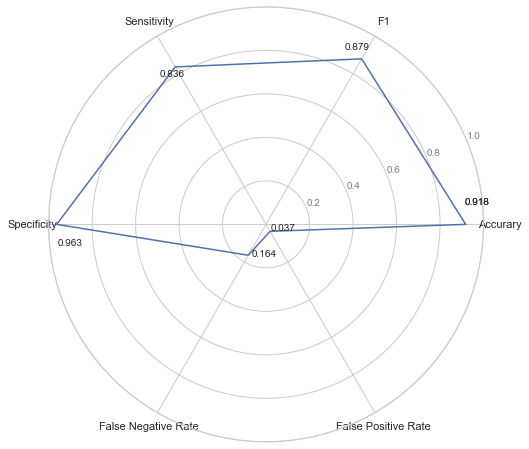

In [7]:
# radar plot
tn = c_count.iloc[0, 0]
tp = c_count.iloc[1, 1]
fp = c_count.iloc[0, 1]
fn = c_count.iloc[1, 0]

names = [
    "Accurary", "F1", "Sensitivity", "Specificity", 
    "False Negative Rate", "False Positive Rate"
]

scores = np.round([
    (tp + tn) / (tp + fp + fn + tn), tp / (tp + 0.5 * (fp + fn)), 
    tp / (tp + fn), tn / (tn + fp), fn / (fn + tp), fp / (fp + tn)
], 3)

num_names = len(names)
num_scores = len(scores)
assert num_names == num_scores, "names and scores are not of the same length"

scores = np.concatenate((scores, scores[:1]))

angles = [n / float(num_names) * 2 * math.pi for n in range(num_names)]
angles += angles[:1]

plt.polar(angles, scores)
for a, s in zip(angles, scores):
    plt.text(a + 0.1, s, s, size=10)
plt.xticks(angles[:-1], names)
plt.yticks(list(np.linspace(0.2, 1, 5)), color="grey", size=10)
plt.ylim(0, 1)
plt.show()